In [1]:
import tensorflow as tf

2024-03-08 21:35:10.087296: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 21:35:10.114945: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 21:35:11.385215: I itex/core/wrapper/itex_cpu_wrapper.cc:42] Intel Extension for Tensorflow* AVX512 CPU backend is loaded.
2024-03-08 21:35:11.959962: I itex/core/wrapper/itex_gpu_wrapper.cc:35] Intel Extension for Tensorflow* GPU backend is loaded.
2024-03-08 21:35:11.992465: W itex/core/op

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define paths to your training and testing directories
train_dir = 'model_dataset/train'
test_dir = 'model_dataset/test'

# Define ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255) # rescale pixel values to [0,1]

# Define ImageDataGenerator for testing data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # Since we use binary_crossentropy loss, we need binary labels

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# Define your model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)


Found 3245 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


2024-03-08 21:35:12.569383: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform XPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-08 21:35:12.569424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:XPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: XPU, pci bus id: <undefined>)
2024-03-08 21:35:13.307692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type CPU is enabled.


Epoch 1/100
101/101 [==============================] - 6s 46ms/step - loss: 0.2065 - accuracy: 0.9374 - val_loss: 0.7057 - val_accuracy: 0.8017
Epoch 2/100
101/101 [==============================] - 2s 19ms/step - loss: 0.1066 - accuracy: 0.9716 - val_loss: 0.4257 - val_accuracy: 0.8667
Epoch 3/100
101/101 [==============================] - 2s 17ms/step - loss: 0.0732 - accuracy: 0.9797 - val_loss: 0.3674 - val_accuracy: 0.8900
Epoch 4/100
101/101 [==============================] - 2s 18ms/step - loss: 0.0594 - accuracy: 0.9818 - val_loss: 0.3819 - val_accuracy: 0.8817
Epoch 5/100
101/101 [==============================] - 2s 16ms/step - loss: 0.0653 - accuracy: 0.9849 - val_loss: 0.4070 - val_accuracy: 0.8567
Epoch 6/100
101/101 [==============================] - 2s 18ms/step - loss: 0.0420 - accuracy: 0.9877 - val_loss: 0.5298 - val_accuracy: 0.8567
Epoch 7/100
101/101 [==============================] - 2s 19ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.3847 - val_accuracy:

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define paths to your training and testing directories
train_dir = 'data/train'
test_dir = 'data/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Degree range for random rotations
    width_shift_range=0.2,  # Range for random horizontal shifts
    height_shift_range=0.2, # Range for random vertical shifts
    shear_range=0.2,        # Shear angle in counter-clockwise direction
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest'     # Strategy used for filling in newly created pixels
)

# Define ImageDataGenerator for testing data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)








Found 3049 images belonging to 3 classes.
Found 599 images belonging to 3 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import Callback
import numpy as np
from tensorflow.keras.preprocessing import image

# Define paths to your training and testing directories
train_dir = 'data/train'
test_dir = 'data/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

class StopTrainingAtAccuracy(Callback):
    def __init__(self, target_accuracy=0.9):
        super(StopTrainingAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= self.target_accuracy:
            print(f"\nReached target validation accuracy ({self.target_accuracy}), stopping training!")
            self.model.stop_training = True

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

stop_training_callback = StopTrainingAtAccuracy(target_accuracy=0.91)

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      callbacks=[stop_training_callback],
      verbose=1)











Found 3048 images belonging to 3 classes.
Found 599 images belonging to 3 classes.


2024-03-08 21:20:37.713495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform XPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-08 21:20:37.713539: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:XPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: XPU, pci bus id: <undefined>)


Epoch 1/10


2024-03-08 21:20:38.567718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type CPU is enabled.


95/95 [==============================] - 11s 104ms/step - loss: -1434040832.0000 - accuracy: 0.4852 - val_loss: -18626762752.0000 - val_accuracy: 0.4341
Epoch 2/10
95/95 [==============================] - 10s 104ms/step - loss: -1017354190848.0000 - accuracy: 0.4892 - val_loss: -6064748625920.0000 - val_accuracy: 0.4341
Epoch 3/10
95/95 [==============================] - 10s 103ms/step - loss: -36401399726080.0000 - accuracy: 0.4892 - val_loss: -141745597710336.0000 - val_accuracy: 0.4341
Epoch 4/10
13/95 [===>..........................] - ETA: 8s - loss: -138139662286848.0000 - accuracy: 0.4615

KeyboardInterrupt: 

In [3]:
from tensorflow.keras.callbacks import Callback

class StopTrainingAtAccuracy(Callback):
    def __init__(self, target_accuracy=0.9):
        super(StopTrainingAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= self.target_accuracy:
            print(f"\nReached target validation accuracy ({self.target_accuracy}), stopping training!")
            self.model.stop_training = True

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
stop_training_callback = StopTrainingAtAccuracy(target_accuracy=0.95)
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      callbacks=[stop_training_callback],
      verbose=1)


    










2024-03-08 21:16:15.812726: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform XPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-08 21:16:15.812768: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:XPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: XPU, pci bus id: <undefined>)


Epoch 1/100


2024-03-08 21:16:16.667679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type CPU is enabled.


95/95 [==============================] - 12s 109ms/step - loss: -1635100288.0000 - accuracy: 0.4879 - val_loss: -22212177920.0000 - val_accuracy: 0.4341
Epoch 2/100
95/95 [==============================] - 10s 104ms/step - loss: -1134995177472.0000 - accuracy: 0.4892 - val_loss: -6895581528064.0000 - val_accuracy: 0.4341
Epoch 3/100
95/95 [==============================] - 10s 104ms/step - loss: -41569268793344.0000 - accuracy: 0.4892 - val_loss: -160606527160320.0000 - val_accuracy: 0.4341
Epoch 4/100
95/95 [==============================] - 10s 104ms/step - loss: -447776009748480.0000 - accuracy: 0.4892 - val_loss: -1313560181342208.0000 - val_accuracy: 0.4341
Epoch 5/100
95/95 [==============================] - 10s 104ms/step - loss: -2504806673416192.0000 - accuracy: 0.4892 - val_loss: -6168986618167296.0000 - val_accuracy: 0.4341
Epoch 6/100
95/95 [==============================] - 10s 104ms/step - loss: -9656198877937664.0000 - accuracy: 0.4892 - val_loss: -21078700908871680.0000

KeyboardInterrupt: 

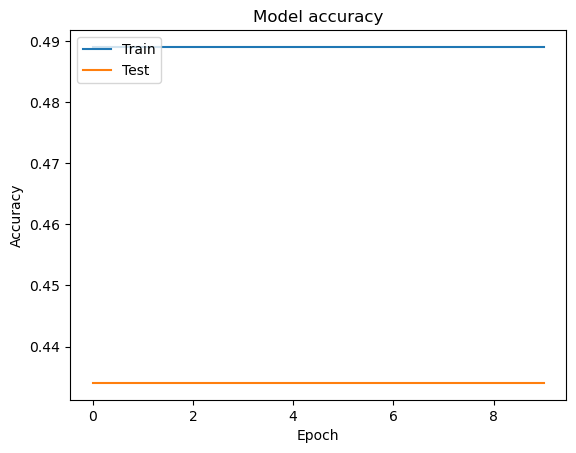

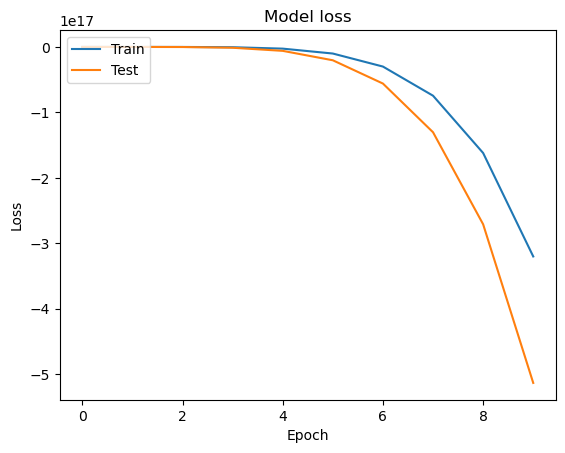

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


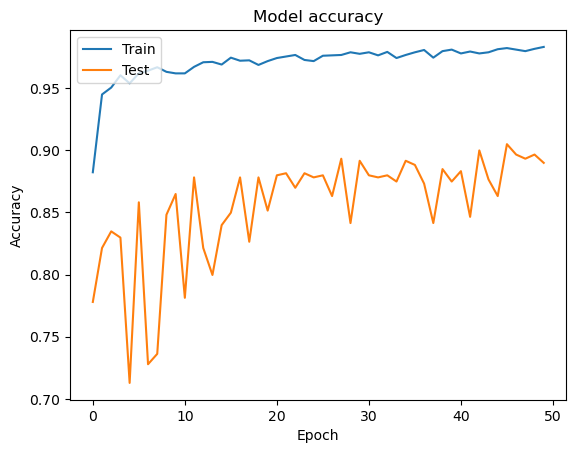

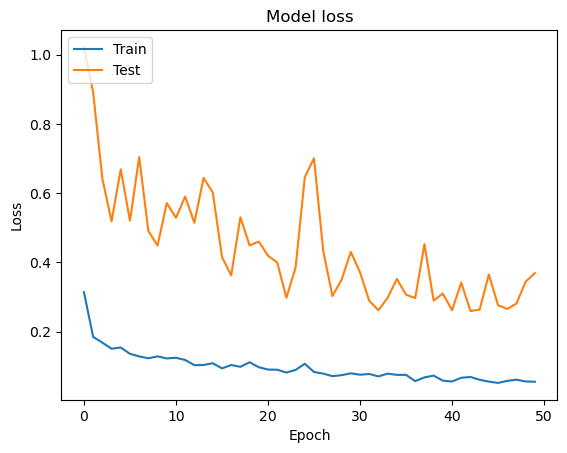

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:




import numpy as np
from tensorflow.keras.preprocessing import image


# Define a function to load and preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Path to the image you want to predict
image_path = 'model_dataset/train/non/nonhuman1_frame105_jpg.rf.d7080ba81432b16c519c792f42d02cea.jpg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(preprocessed_image)

# Class 1 or 0 depending on the threshold
threshold = 0.5
class_label = "non-human" if predictions[0][0] < threshold else "human"

print("Predictions:", predictions)
print("Class:", class_label)


1/1 [==============================] - 0s 22ms/step
Predictions: [[0.]]
Class: non-human


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import Callback
import numpy as np
from tensorflow.keras.preprocessing import image

# Define paths to your training and testing directories
train_dir = 'model_dataset/train'
test_dir = 'model_dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

class StopTrainingAtAccuracy(Callback):
    def __init__(self, target_accuracy=0.9):
        super(StopTrainingAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= self.target_accuracy:
            print(f"\nReached target validation accuracy ({self.target_accuracy}), stopping training!")
            self.model.stop_training = True

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

stop_training_callback = StopTrainingAtAccuracy(target_accuracy=0.91)

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      callbacks=[stop_training_callback],
      verbose=1)

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

image_path = 'Screenshot 2024-01-24 102521.png'
preprocessed_image = preprocess_image(image_path)
predictions = model.predict(preprocessed_image)

threshold = 0.5
class_label = "non-human" if predictions[0][0] < threshold else "human"

print("Predictions:", predictions)
print("Class:", class_label)


Found 3246 images belonging to 2 classes.
Found 599 images belonging to 2 classes.
Epoch 1/10
 72/101 [====================>.........] - ETA: 2s - loss: 0.3278 - accuracy: 0.8657

KeyboardInterrupt: 

In [14]:
image_path = 'Screenshot 2024-01-24 102521.png'
preprocessed_image = preprocess_image(image_path)
predictions = model.predict(preprocessed_image)

threshold = 0.5
class_label = "non-human" if predictions[0][0] < threshold else "human"

print("Predictions:", predictions)
print("Class:", class_label)


1/1 [==============================] - 0s 21ms/step
Predictions: [[1.]]
Class: human


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 128
EPOCHS = 10

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'model_dataset/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'model_dataset/test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

Found 3246 images belonging to 2 classes.
Found 599 images belonging to 2 classes.


In [20]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])



In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
 25/100 [======>.......................] - ETA: 38s - loss: 0.2776 - accuracy: 0.9015WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1000 batches). You may need to use the repeat() function when building your dataset.


2024-03-08 20:13:54.872587: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 2504869658623804701
2024-03-08 20:13:54.872622: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 17413501697719062996
2024-03-08 20:13:54.872648: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4613855566515314282


2024-03-08 20:13:56.664576: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4048058551716269665
2024-03-08 20:13:56.664624: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5664042494201644960


100/100 [==============================] - 17s 143ms/step - loss: 0.2780 - accuracy: 0.9017 - val_loss: 0.6389 - val_accuracy: 0.7947
